In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from SuchTree import SuchTree, SuchLinkedTrees, pearson
import seaborn
import pandas as pd

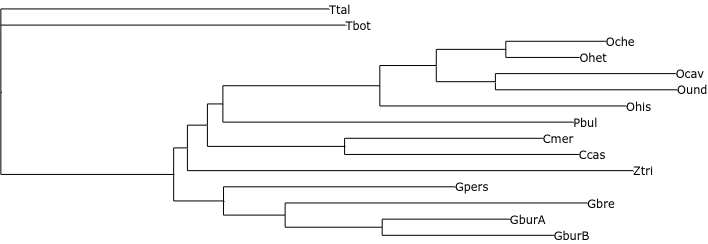

In [5]:
from ete2 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
ts.show_leaf_name = True
ts.branch_vertical_margin = 2
ts.scale = 5000
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle['size'] = 0

ete_tree = Tree( 'gopher.tree' )

for node in ete_tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ').replace('\'','') )
        tf.fsize = 10
        tf.hz_align = 100
        node.add_face( tf, 0 )

ete_tree.render("%%inline", w=200, units="mm", tree_style=ts)

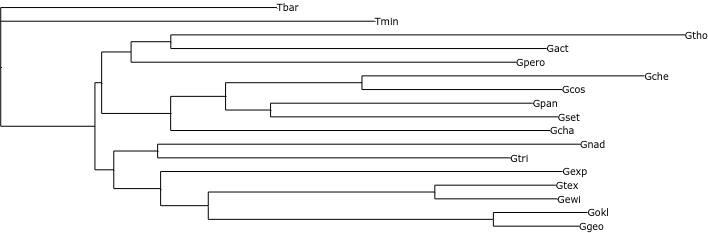

In [6]:
from ete2 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
ts.show_leaf_name = True
ts.branch_vertical_margin = 2
ts.scale = 5000
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle['size'] = 0

ete_tree = Tree( 'lice.tree' )

for node in ete_tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ').replace('\'','') )
        tf.fsize = 10
        tf.hz_align = 100
        node.add_face( tf, 0 )

ete_tree.render("%%inline", w=200, units="mm", tree_style=ts)

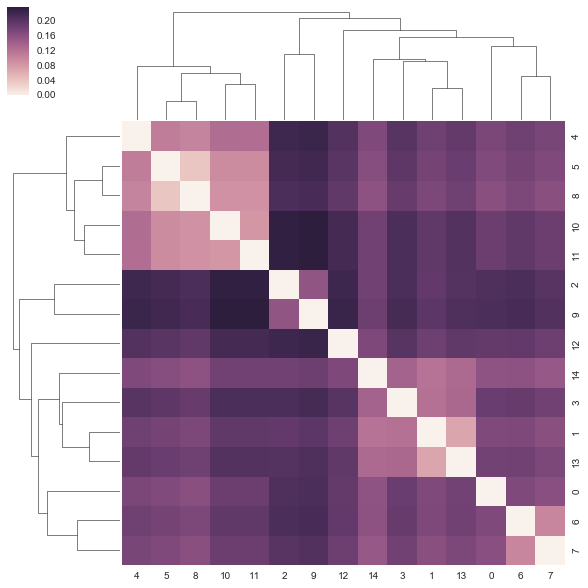

In [7]:
T1 = SuchTree( 'gopher.tree' )
D1 = zeros( ( len(T1.leafs),len(T1.leafs) ) )
for i,a in enumerate(T1.leafs.values()) :
    for j,b in enumerate( T1.leafs.values() ) :
        D1[i,j] = T1.distance( a, b )
seaborn.clustermap(D1)

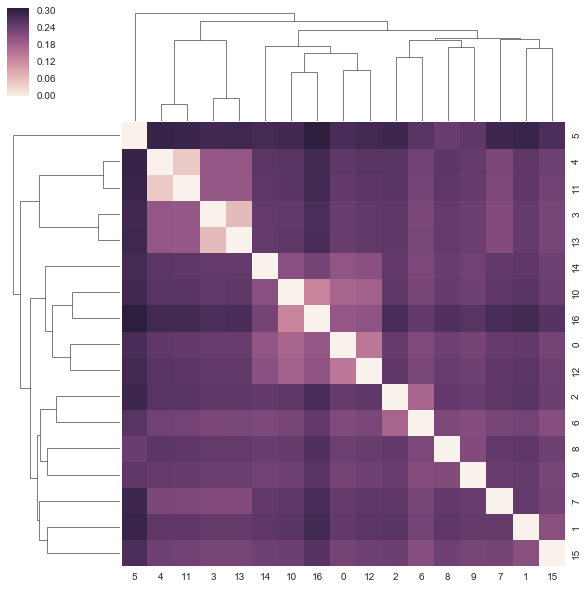

In [8]:
T2 = SuchTree( 'lice.tree' )
D2 = zeros( ( len(T2.leafs),len(T2.leafs) ) )
for i,a in enumerate(T2.leafs.values()) :
    for j,b in enumerate( T2.leafs.values() ) :
        D2[i,j] = T2.distance( a, b )
seaborn.clustermap(D2)

In [9]:
links = pd.DataFrame.from_csv( 'gopher-louse-associations.txt' )
links

,Gset,Gpan,Gche,Gcos,Gcha,Ggeo,Gokl,Gewi,Gtex,Gexp,Gact,Gpero,Gtho,Gtri,Gnad,Tmin,Tbar
GburA,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
GburB,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Gbre,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Gpers,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Ound,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ocav,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Oche,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ohet,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Ohis,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Pbul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
SLT = SuchLinkedTrees( T1, T2, links )

139693419716192 allocating columns in 3903381112
bulding default subset.
bulding default link list.


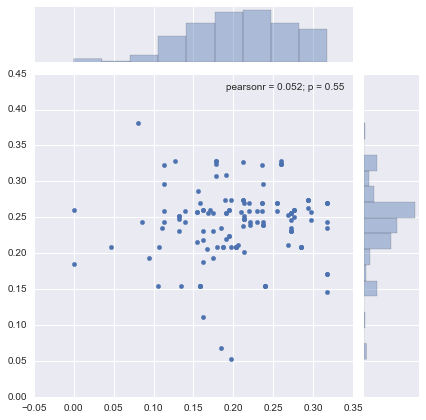

In [12]:
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

In [13]:
from scipy.stats import kendalltau, pearsonr
print kendalltau( result['TreeA'], result['TreeB'] )
print pearsonr( result['TreeA'], result['TreeB'] )

KendalltauResult(correlation=0.06538935966188017, pvalue=0.25877080136347419)
(0.051817138193830679, 0.54909857547625696)


In [18]:
from skbio import TreeNode

t1 = TreeNode.read( 'gopher.tree' )
t2 = TreeNode.read( 'lice.tree' )

d1 = t1.tip_tip_distances()
d2 = t2.tip_tip_distances()

In [60]:
from itertools import combinations

l = links.unstack()
l = l[l>0]

d_host = []
d_lice = []
for (a,b),(c,d) in combinations( l.index, 2 ) :
    B,D = map( d1.ids.index, [b,d] )
    A,C = map( d2.ids.index, [a,c] )
    d_host.append( d1[B,D] )
    d_lice.append( d2[A,C] )

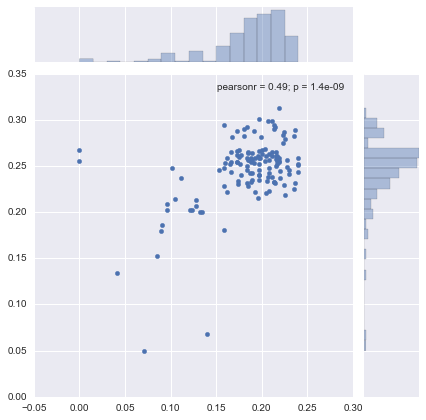

In [61]:
seaborn.jointplot( array(d_host), array(d_lice) )

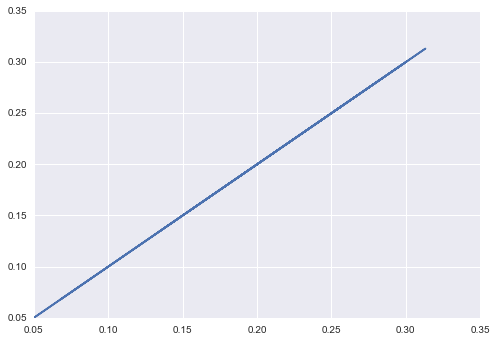

In [71]:
d_st, d_sb = [],[]
for a,b in combinations( T2.leafs.keys(), 2 ) :
    d_st.append( T2.distance( a, b ) )
    A, B = map( d2.ids.index, [a,b] )
    d_sb.append( d2[ A, B ] )
plot( d_st, d_sb )

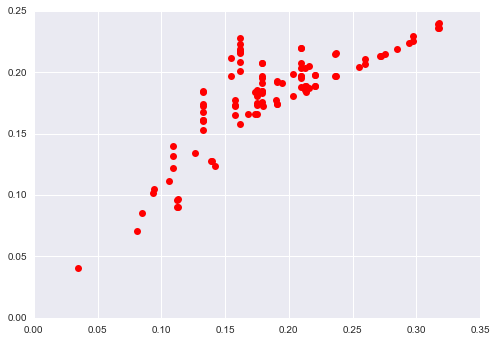

In [84]:
d_st, d_sb = [],[]
d = []
for a,b in combinations( T1.leafs.keys(), 2 ) :
    d.append( map( lambda x : T1.leafs[x], ( a, b ) ) ) 
    A, B = map( d1.ids.index, [a,b] )
    d_sb.append( d1[ A, B ] )
d_st = T1.distances( array(d) )
plot( d_st, d_sb, 'ro' )

In [92]:
dd = d1.to_data_frame().unstack()

In [96]:
dd.to_csv( 'text.matrix', sep='\t' )

In [102]:
t1.write( 'gopher.bifrucated.tree')

'gopher.bifrucated.tree'

In [114]:
import dendropy
dpt = dendropy.Tree.get( file=open('gopher.bifrucated.tree'), schema='newick')
dpt.resolve_polytomies()
for id, node in enumerate( dpt.inorder_node_iter() ) :
    if node.taxon :
        print id, node.taxon.label, type(node.edge_length)

0 Oche <type 'float'>
2 Ohet <type 'float'>
4 Ocav <type 'float'>
6 Ound <type 'float'>
8 Ohis <type 'float'>
10 Pbul <type 'float'>
12 Cmer <type 'float'>
14 Ccas <type 'float'>
16 Ztri <type 'float'>
18 Gpers <type 'float'>
20 Gbre <type 'float'>
22 GburA <type 'float'>
24 GburB <type 'float'>
26 Ttal <type 'float'>
28 Tbot <type 'float'>


In [118]:
TT = SuchTree( 'gopher.tree' )